In [1]:
import pandas as pd
import numpy as np
import sys
import pickle as pkl
import pickle
import joblib
import itertools
from math import ceil 

#Classifier imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC

# Performance metrics
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# load  preprocessed dataset
data=pd.read_csv("Train.csv")

data_new=data.values

X=data_new[:,:-1] 
Y=data_new[:,-1]

#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30,random_state=7)

In [3]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
joblib.dump(scaler, 'ss.pkl')
x_test=scaler.transform(x_test)

In [5]:
LSVC_model2=LinearSVC(tol=1,C=1.5)
from time import time
t0 = time()
New_LSVC_Model=LSVC_model2.fit(x_train,y_train)
tf = time() - t0
print ("The model trained in {} seconds".format(round(tf, 3)))

The model trained in 230.46 seconds


E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
#train accuracy
print("Train accuracy:",New_LSVC_Model.score(x_train,y_train)*100)
#validation accuracy
y_pred = New_LSVC_Model.predict(x_test)
print("Validation Accuracy :", accuracy_score(y_test, y_pred)*100)


Train accuracy: 90.26972086550794
Validation Accuracy : 90.39903226319895


In [7]:
target_names = ['Benign', 'Attack']
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

      Benign      0.878     0.987     0.929    200624
      Attack      0.970     0.758     0.851    113511

    accuracy                          0.904    314135
   macro avg      0.924     0.872     0.890    314135
weighted avg      0.911     0.904     0.901    314135



In [10]:
#######Save the new model
pickle.dump(New_LSVC_Model, open("LSVC.dat", "wb"))

In [8]:
res = confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(res)

tn = res[0][0]
fp = res[0][1]
fn = res[1][0]
tp = res[1][1]

print("\nTotal number of true positives(Attack identified as Attack))", tp)

print("Total number of false negatives (Attack identified as Benign)",fn)

print("Total number of false positives(Benign identified as Attack)",fp)

print("Total number of true negatives (Benign identified as Benign)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn)

tpr = float(tp)/(tp+fn)
print("True Positive Rate (TPR/Recall/Sensitivity/Hit rate):", tpr)

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR)/Fall out:",fpr)

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR/Miss Rate):",fnr)

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):", specificity)

precision=float(tp)/(tp+fp)

print("Total number of correct predictions(Precision/Positive Predictive value/PPV):",precision)

npv = tn / (tn + fn)
print("Negative Predictive value (NPV):",npv)

fdr = fp/ (fp + tp)

print("False Discovery Rate (FDR):",fdr)

fScore = 2*((precision*tpr)/(precision+tpr))

print("F1-Score:", fScore)

informedness= tpr + specificity -1

print("Informedness:", informedness)


markedness = precision + npv -1
print("Markedness:", markedness)


acc=float(tp+tn)/(tp+tn+fp+fn)
print("Accuracy:", acc)

error_rate= 1-acc

print ( "Misclassification/ error rate",error_rate)

Confusion matrix:
[[197987   2637]
 [ 27523  85988]]

Total number of true positives(Attack identified as Attack)) 85988
Total number of false negatives (Attack identified as Benign) 27523
Total number of false positives(Benign identified as Attack) 2637
Total number of true negatives (Benign identified as Benign) 197987
Real positives: 113511
Real negatives: 200624
Predicted positives: 88625
Predicted negatives: 225510
True Positive Rate (TPR/Recall/Sensitivity/Hit rate): 0.7575301072142788
False Positive Rate (FPR)/Fall out: 0.013143990748863545
False Negative Rate (FNR/Miss Rate): 0.2424698927857212
True Negative Rate (TNR/Specificity/selectivity): 0.9868560092511365
Total number of correct predictions(Precision/Positive Predictive value/PPV): 0.9702454160789845
Negative Predictive value (NPV): 0.8779521972418075
False Discovery Rate (FDR): 0.029754583921015515
F1-Score: 0.8507935251513834
Informedness: 0.7443861164654153
Markedness: 0.848197613320792
Accuracy: 0.9039903226319894
Mi

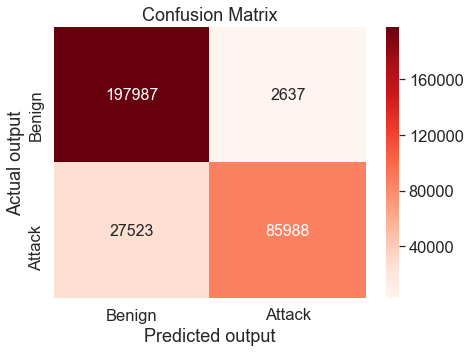

In [9]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
res = confusion_matrix(y_test,y_pred)

dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = dpi * 1.5

sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(7,5))
sns.heatmap (res,annot=True,fmt="d",annot_kws={"size": 16}, cmap="Reds", ax=ax,xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##############prediction on synthesized test attacks##############

In [13]:
#predict on synthesized Slow httptest DoS attack

test_data=pd.read_csv('ShttpAA1.csv')
test_data_new=test_data.values

X_test1=test_data_new[:,:-1] 
Y_test1=test_data_new[:,-1]

#predict on synthesized Slowloris DoS attack

test_data2=pd.read_csv('SlowAA1.csv')
test_data_new2=test_data2.values


X_test2=test_data_new2[:,:-1] 
Y_test2=test_data_new2[:,-1]

In [14]:
# load model from file
model2 = pickle.load(open("LSVC.dat", "rb"))

#load the scaler values and transform the test data
scaler = joblib.load('ss.pkl')
X_test1=scaler.transform(X_test1)
X_test2=scaler.transform(X_test2)


In [15]:
Y_pred1 = model2.predict(X_test1)
print("Testing Accuracy for Slow httptest= ", model2.score(X_test1,Y_test1)*100)
print("Classification Report for Slow httptest:-\n",classification_report(Y_test1,Y_pred1))

Y_pred2 = model2.predict(X_test2)
print("Testing Accuracy for Slowloris= ", model2.score(X_test2,Y_test2)*100)
print("Classification Report for Slowloris:-\n",classification_report(Y_test2,Y_pred2))

Testing Accuracy for Slow httptest=  18.171228887594644
Classification Report for Slow httptest:-
               precision    recall  f1-score   support

         0.0       0.14      0.93      0.25       244
         1.0       0.84      0.06      0.11      1473

    accuracy                           0.18      1717
   macro avg       0.49      0.50      0.18      1717
weighted avg       0.74      0.18      0.13      1717

Testing Accuracy for Slowloris=  96.2890625
Classification Report for Slowloris:-
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       244
         1.0       0.94      0.99      0.97       268

    accuracy                           0.96       512
   macro avg       0.97      0.96      0.96       512
weighted avg       0.96      0.96      0.96       512



In [19]:
# Compute confusion matrix for Slow httptest
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit

cm1 = confusion_matrix(Y_test1, Y_pred1)
print("Confusion matrix for Slow httptest:")
print(cm1)
tn = cm1[0][0]
fp = cm1[0][1]
fn = cm1[1][0]
tp = cm1[1][1]

print("\nTotal number of true positives(Attack identified as Attack))", tp)
print("Total number of false negatives (Attack identified as Benign)",fn)
print("Total number of false positives(Benign identified as Attack)",fp)
print("Total number of true negatives (Benign identified as Benign)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn,"\n")

Confusion matrix for Slow httptest:
[[ 228   16]
 [1389   84]]

Total number of true positives(Attack identified as Attack)) 84
Total number of false negatives (Attack identified as Benign) 1389
Total number of false positives(Benign identified as Attack) 16
Total number of true negatives (Benign identified as Benign) 228
Real positives: 1473
Real negatives: 244
Predicted positives: 100
Predicted negatives: 1617 



In [18]:
# Compute confusion matrix for Slowloris
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit

cm2 = confusion_matrix(Y_test2, Y_pred2)
print("Confusion matrix for Slowloris:")
print(cm2)
tn = cm2[0][0]
fp = cm2[0][1]
fn = cm2[1][0]
tp = cm2[1][1]

print("\nTotal number of true positives(Attack identified as Attack))", tp)
print("Total number of false negatives (Attack identified as Benign)",fn)
print("Total number of false positives(Benign identified as Attack)",fp)
print("Total number of true negatives (Benign identified as Benign)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn,"\n")

Confusion matrix for Slowloris:
[[228  16]
 [  3 265]]

Total number of true positives(Attack identified as Attack)) 265
Total number of false negatives (Attack identified as Benign) 3
Total number of false positives(Benign identified as Attack) 16
Total number of true negatives (Benign identified as Benign) 228
Real positives: 268
Real negatives: 244
Predicted positives: 281
Predicted negatives: 231 

